# Libraries and Functions

The following cell contains the libraries and functions required to make this example implementation work.

**Libraries**
|Library|Required|
|---|---|
|matplotlib|NO|
|CosineCentroids|YES|
|random|NO|

**Functions**
|Functions|Required|
|---|---|
|Generate_Random_Vectors|NO|
|Generate_Random_Color|NO|

In [6]:
# Install packages
%pip install -U ipykernel matplotlib

# Import libraries
from matplotlib import pyplot as plt # Import matplotlib for visualization
from CosineCentroids import Cosine_Centroids
from KMeans import K_Means # Import the K-Means model
from random import choice, randint # Used for this example, but not required

# Functions
def Generate_Random_Vectors(vectorCount: int, dimensionCount: int = 2, minValue: int = -10, maxValue: int = 10) -> list[list[int]]:
    """
    Generate a matrix of vectors with random values.

    Parameters:
        vectorCount (int): The number of vectors to generate.
        dimensionCount (int): The number of dimensions in each vector. Defaults to 2.
        minValue (int): The minimum random value. Defaults to -10.
        maxValue (int): The maximum random value. Defaults to 10.

    Returns:
        list[list[int]]: A matrix of vectors with random values.
    """

    matrix: list[list[int]] = []

    for i in range(vectorCount):
        vector: list[int] = []

        for j in range(dimensionCount):
            vector.append(randint(minValue, maxValue))

        matrix.append(vector)

    return matrix

def Generate_Random_Color() -> str:
    """
    Generate a random color.

    Returns:
        str: A random color.
    """
    characters = '0123456789ABCDEF'

    return '#' + ''.join([choice(characters) for _ in range(6)])

In [36]:
matrix: list[list[float]] = []
with open('DataSet.csv', 'r') as f:
    for line in f.readlines()[1:1000]:
        rawVector = line.split(',')[:-1]
        vector = rawVector[1:]
        #vector = [rawVector[3], rawVector[4], rawVector[5]]
        vector = [float(i) for i in vector]
        matrix.append(vector)

for vector in matrix[:5]:
    print(vector)

[0.0, 0.0, 67.0, 2.0, 124670.0, 1.0]
[1.0, 1.0, 22.0, 1.0, 150773.0, 1.0]
[0.0, 0.0, 49.0, 1.0, 89210.0, 0.0]
[0.0, 0.0, 45.0, 1.0, 171565.0, 1.0]
[0.0, 0.0, 53.0, 1.0, 149031.0, 1.0]


CC Epochs: 37
KM Epochs: 15


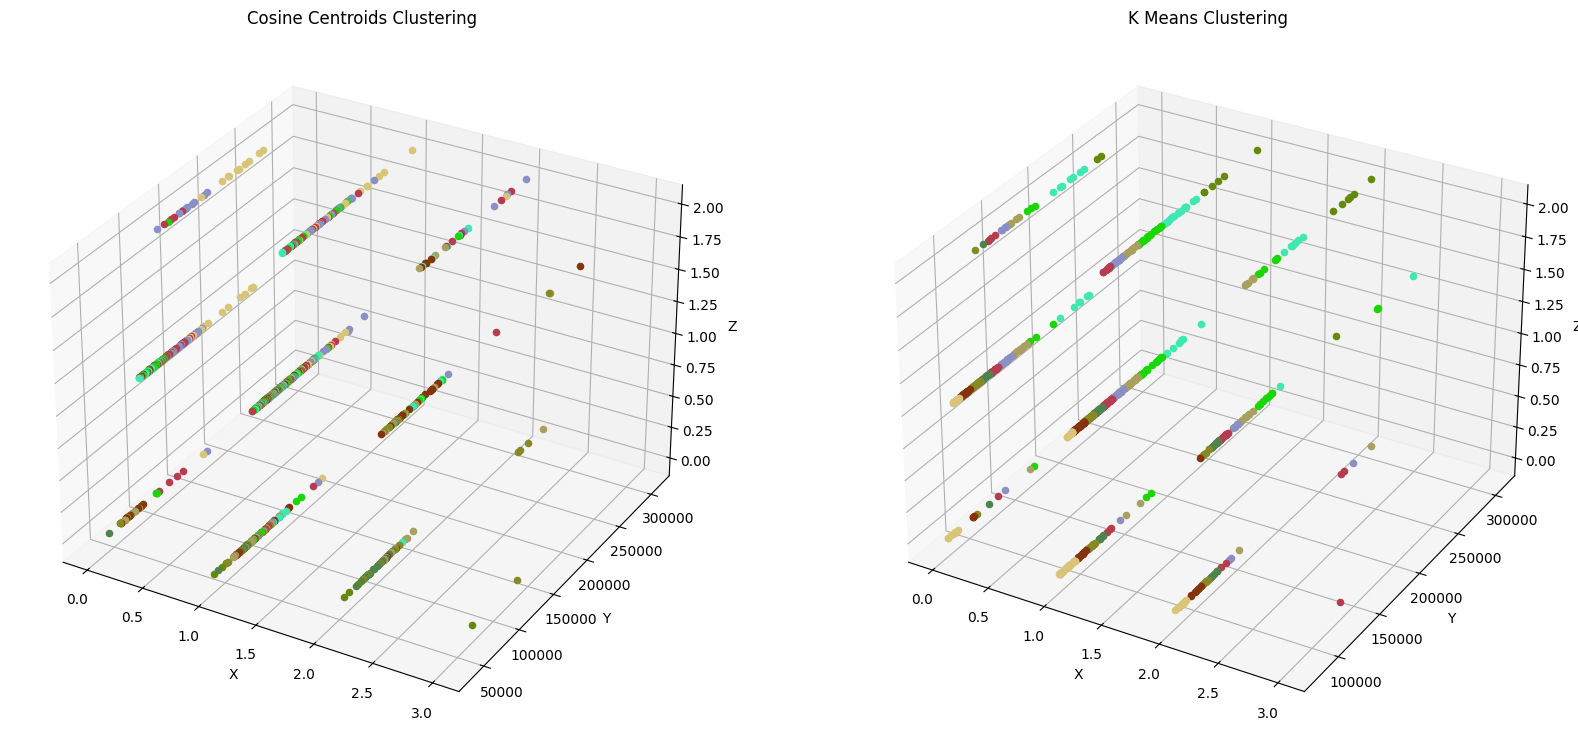

In [37]:
# Initialize the models
model_CC = Cosine_Centroids(
    trainingMatrix=matrix,
    nGroups=10
)
model_KM = K_Means(
    trainingMatrix=matrix,
    kGroups=10,
    threshold=1
)

# Display Training Time
print(f"CC Epochs: {model_CC.epoch}")
print(f"KM Epochs: {model_KM.epoch}")

colors = [Generate_Random_Color() for _ in range(10)]

# Prepare for visualization
figure, (cc_axis, km_axis) = plt.subplots(1, 2, subplot_kw={'projection': '3d'}, figsize=(20, 20))
cc_axis.set_xlabel('X')
cc_axis.set_ylabel('Y')
cc_axis.set_zlabel('Z')
cc_axis.set_title('Cosine Centroids Clustering')
for index, cluster in enumerate(model_CC.clusters):
    color = Generate_Random_Color()
    for vector in cluster.vectors:
        cc_axis.scatter(vector[3], vector[4], vector[5], color=colors[index])

km_axis.set_xlabel('X')
km_axis.set_ylabel('Y')
km_axis.set_zlabel('Z')
km_axis.set_title('K Means Clustering')
for index, cluster in enumerate(model_KM.clusters):
    color = Generate_Random_Color()
    for vector in cluster.vectors:
        km_axis.scatter(vector[3], vector[4], vector[5], color=colors[index])

plt.show()